In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

import tensorflow as tf


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
H:\Users\Gwydion\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub

In [ ]:
df_spectra=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])
x_data=np.asarray([df_spectra["no_of_max"].values]).transpose()
x_data_max=max(x_data)
x_data=x_data/x_data_max
#x_data=np.asarray([df_spectra[["no_of_max","Energy_highest_max_normalized"]].to_numpy()])[0]

y_data=np.asarray([df_spectra[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
df_spectra.head(-50)


In [ ]:
print(y_data.shape)

print(x_data.shape)


print(y_data)

from sklearn.preprocessing import MultiLabelBinarizer
le = MultiLabelBinarizer()
le.fit(y_data)
y_data_enc=le.transform(y_data)


In [ ]:
#always seems to leave some values at zero
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    #model.add(Dense(25, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_model2(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(15, input_dim=n_inputs, kernel_initializer='ones', activation='relu'))
   # model.add(Dense(5, activation='sigmoid'))
   # model.add(Dense(10, activation='sigmoid'))

    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=1e-5))
    return model

In [ ]:
def evaluate_model(X, y, epochs):
    results = list()
    n_inputs = X.shape[1]
    print(n_inputs)
    n_outputs = y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
       # print(X_train[0],y_train[0])
        #print(len(X_train))
        #print(X_train,y_train)
        # define model
        model = get_model2(n_inputs, n_outputs)
        # fit model
        #print(len(X_train))
        model.fit(X_train, y_train, verbose=0, epochs=epochs)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat
        # calculate accuracy
        
        rse=model.evaluate(X_test,y_test)
        
        #print(y_test,yhat)
        
        
        # store result
        #print( rse)
        results.append(rse)
    
    #y_predict1=[yhat[i][0] for i in range(len(yhat))]
   # y_predict2=[yhat[i][1] for i in range(len(yhat))]
   #y_test1=[y_test[i][0] for i in range(len(y_test))]
   # y_test2=[y_test[i][1] for i in range(len(y_test))]
   # print(y_test)
   # print(yhat)
   
    
    df_test=pd.DataFrame(y_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
    df_hat=pd.DataFrame(yhat,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
   # df_test=pd.DataFrame(y_test,columns=["NO_test"])
   # df_hat=pd.DataFrame(yhat,columns=["NO_hat"])

    return results,pd.concat([df_test,df_hat], axis=1)




In [ ]:
results=[]
epochs_list=[]
complete_range=[]
for i in range(50,150,10):
    complete_range.append(i)


print(complete_range)
#for i in complete_range:#
#    epochs_list.append(i)
#    results.append( evaluate_model(x_data,y_data,epochs_list[-1])[0])

results,compare =evaluate_model(x_data,y_data,7500)

In [ ]:
#results_avg=[ sum(res)/len(res) for res in results   ]

print(results)
#plt.plot(epochs_list,results_avg)

print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
compare.head()

In [3]:
#Validation is now done in the .fit() function
# testing data is now only used for final evaulation

df_spectra_new=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])



x_data_max_new=max(df_spectra_new["no_of_max"])

df_training = df_spectra_new.sample(frac=0.8,random_state=10)
df_testing=df_spectra_new.drop(df_training.index)


x_data_train=np.asarray([df_training["no_of_max"].values]).transpose()
x_data_train=x_data_train/x_data_max_new

x_data_test=np.asarray([df_testing["no_of_max"].values]).transpose()
x_data_test=x_data_test/x_data_max_new

y_data_train=np.asarray([df_training[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
y_data_test=np.asarray([df_testing[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]

print(y_data_train.shape)
print(x_data_train.shape)

(583, 6)
(583, 1)


In [41]:

def plot_the_loss_curve(epochs, mse,val_mse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(epochs, mse, label="Loss")
    plt.plot(epochs, val_mse, label="Val Loss")

    plt.legend()
    plt.ylim([min(mse)*0.5, 0.5])
    plt.show()  

#print("Defined the plot_the_loss_curve function.")

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(30, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
   

    # model.add(Dense(500, activation='linear'))
   # model.add(Dense(10, activation='linear'))
   # print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='MAE', optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics="accuracy")
    return model


def train_model(model, x_data,y_data, epochs, 
                batch_size=None):
    """Train the model by feeding it data."""
    
    
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=True, verbose=1,validation_split=0.2) 
    
    epochs = history.epoch
  
    hist = pd.DataFrame(history.history)
    #hist.head()
    #mse = hist["mean_squared_error"]
    
    return hist,epochs

In [42]:
epochs = 600
batch_size = 250
my_model=get_model(x_data_train.shape[1],y_data_train.shape[1])

df_hist,epochs = train_model(my_model, x_data_train,y_data_train, epochs, 
                          batch_size)


Epoch 1/600
2/2 [==============================] - 0s 30ms/step - loss: 0.5415 - accuracy: 0.3627 - val_loss: 0.5379 - val_accuracy: 0.3761
Epoch 2/600
2/2 [==============================] - 0s 10ms/step - loss: 0.5399 - accuracy: 0.3627 - val_loss: 0.5367 - val_accuracy: 0.3761
Epoch 3/600
2/2 [==============================] - 0s 9ms/step - loss: 0.5384 - accuracy: 0.3627 - val_loss: 0.5354 - val_accuracy: 0.3761
Epoch 4/600
2/2 [==============================] - 0s 9ms/step - loss: 0.5369 - accuracy: 0.3627 - val_loss: 0.5341 - val_accuracy: 0.3761
Epoch 5/600
2/2 [==============================] - 0s 9ms/step - loss: 0.5354 - accuracy: 0.3627 - val_loss: 0.5328 - val_accuracy: 0.3761
Epoch 6/600
2/2 [==============================] - 0s 11ms/step - loss: 0.5339 - accuracy: 0.3627 - val_loss: 0.5316 - val_accuracy: 0.3761
Epoch 7/600
2/2 [==============================] - 0s 8ms/step - loss: 0.5323 - accuracy: 0.3627 - val_loss: 0.5303 - val_accuracy: 0.3761
Epoch 8/600
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.4514 - accuracy: 0.3240 - val_loss: 0.4619 - val_accuracy: 0.3761
Epoch 60/600
2/2 [==============================] - 0s 9ms/step - loss: 0.4502 - accuracy: 0.3240 - val_loss: 0.4608 - val_accuracy: 0.3761
Epoch 61/600
2/2 [==============================] - 0s 9ms/step - loss: 0.4490 - accuracy: 0.3240 - val_loss: 0.4597 - val_accuracy: 0.3504
Epoch 62/600
2/2 [==============================] - 0s 9ms/step - loss: 0.4477 - accuracy: 0.3133 - val_loss: 0.4586 - val_accuracy: 0.3504
Epoch 63/600
2/2 [==============================] - 0s 10ms/step - loss: 0.4465 - accuracy: 0.3133 - val_loss: 0.4575 - val_accuracy: 0.3504
Epoch 64/600
2/2 [==============================] - 0s 11ms/step - loss: 0.4452 - accuracy: 0.3133 - val_loss: 0.4563 - val_accuracy: 0.3504
Epoch 65/600
2/2 [==============================] - 0s 9ms/step - loss: 0.4439 - accuracy: 0.3133 - val_loss: 0.4552 - val_accuracy: 0.3504
Epoch 66/600
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 0.3396 - accuracy: 0.3090 - val_loss: 0.3642 - val_accuracy: 0.3333
Epoch 118/600
2/2 [==============================] - 0s 10ms/step - loss: 0.3390 - accuracy: 0.3090 - val_loss: 0.3635 - val_accuracy: 0.3333
Epoch 119/600
2/2 [==============================] - 0s 9ms/step - loss: 0.3383 - accuracy: 0.3090 - val_loss: 0.3628 - val_accuracy: 0.3333
Epoch 120/600
2/2 [==============================] - 0s 9ms/step - loss: 0.3376 - accuracy: 0.3090 - val_loss: 0.3622 - val_accuracy: 0.3333
Epoch 121/600
2/2 [==============================] - 0s 10ms/step - loss: 0.3370 - accuracy: 0.3090 - val_loss: 0.3616 - val_accuracy: 0.3333
Epoch 122/600
2/2 [==============================] - 0s 9ms/step - loss: 0.3364 - accuracy: 0.3069 - val_loss: 0.3610 - val_accuracy: 0.3333
Epoch 123/600
2/2 [==============================] - 0s 11ms/step - loss: 0.3358 - accuracy: 0.3069 - val_loss: 0.3604 - val_accuracy: 0.3333
Epoch 124/600
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.2875 - accuracy: 0.2618 - val_loss: 0.3102 - val_accuracy: 0.2308
Epoch 176/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2869 - accuracy: 0.2618 - val_loss: 0.3095 - val_accuracy: 0.2308
Epoch 177/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2863 - accuracy: 0.2618 - val_loss: 0.3089 - val_accuracy: 0.2308
Epoch 178/600
2/2 [==============================] - 0s 12ms/step - loss: 0.2857 - accuracy: 0.2618 - val_loss: 0.3083 - val_accuracy: 0.2308
Epoch 179/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2851 - accuracy: 0.2618 - val_loss: 0.3076 - val_accuracy: 0.2308
Epoch 180/600
2/2 [==============================] - 0s 11ms/step - loss: 0.2845 - accuracy: 0.2618 - val_loss: 0.3070 - val_accuracy: 0.2308
Epoch 181/600
2/2 [==============================] - 0s 13ms/step - loss: 0.2839 - accuracy: 0.2618 - val_loss: 0.3063 - val_accuracy: 0.2308
Epoch 182/600
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.2592 - accuracy: 0.1803 - val_loss: 0.2791 - val_accuracy: 0.1795
Epoch 234/600
2/2 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.1803 - val_loss: 0.2788 - val_accuracy: 0.1795
Epoch 235/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2587 - accuracy: 0.1803 - val_loss: 0.2785 - val_accuracy: 0.1795
Epoch 236/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2585 - accuracy: 0.1803 - val_loss: 0.2782 - val_accuracy: 0.1795
Epoch 237/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2582 - accuracy: 0.1803 - val_loss: 0.2779 - val_accuracy: 0.1795
Epoch 238/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2579 - accuracy: 0.1867 - val_loss: 0.2776 - val_accuracy: 0.1966
Epoch 239/600
2/2 [==============================] - 0s 11ms/step - loss: 0.2577 - accuracy: 0.1867 - val_loss: 0.2773 - val_accuracy: 0.1795
Epoch 240/600
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.2452 - accuracy: 0.2511 - val_loss: 0.2629 - val_accuracy: 0.2222
Epoch 292/600
2/2 [==============================] - 0s 11ms/step - loss: 0.2450 - accuracy: 0.2511 - val_loss: 0.2626 - val_accuracy: 0.2222
Epoch 293/600
2/2 [==============================] - 0s 11ms/step - loss: 0.2447 - accuracy: 0.2103 - val_loss: 0.2624 - val_accuracy: 0.1966
Epoch 294/600
2/2 [==============================] - 0s 11ms/step - loss: 0.2445 - accuracy: 0.1845 - val_loss: 0.2622 - val_accuracy: 0.1795
Epoch 295/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2443 - accuracy: 0.1931 - val_loss: 0.2619 - val_accuracy: 0.1795
Epoch 296/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2441 - accuracy: 0.1931 - val_loss: 0.2617 - val_accuracy: 0.1795
Epoch 297/600
2/2 [==============================] - 0s 12ms/step - loss: 0.2438 - accuracy: 0.1824 - val_loss: 0.2614 - val_accuracy: 0.1966
Epoch 298/600
2/2 [==

Epoch 349/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2332 - accuracy: 0.1803 - val_loss: 0.2491 - val_accuracy: 0.1795
Epoch 350/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2330 - accuracy: 0.1803 - val_loss: 0.2489 - val_accuracy: 0.1795
Epoch 351/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2328 - accuracy: 0.1803 - val_loss: 0.2487 - val_accuracy: 0.1795
Epoch 352/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2327 - accuracy: 0.1803 - val_loss: 0.2486 - val_accuracy: 0.1795
Epoch 353/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2325 - accuracy: 0.1803 - val_loss: 0.2484 - val_accuracy: 0.1795
Epoch 354/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2324 - accuracy: 0.1803 - val_loss: 0.2482 - val_accuracy: 0.1795
Epoch 355/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2323 - accuracy: 0.1803 - val_loss: 0.2480 - val_accuracy: 0.1795
Epoch 356/600

Epoch 407/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2259 - accuracy: 0.1695 - val_loss: 0.2399 - val_accuracy: 0.1453
Epoch 408/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2258 - accuracy: 0.1695 - val_loss: 0.2398 - val_accuracy: 0.1453
Epoch 409/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2256 - accuracy: 0.1695 - val_loss: 0.2396 - val_accuracy: 0.1453
Epoch 410/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.1695 - val_loss: 0.2395 - val_accuracy: 0.1453
Epoch 411/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2254 - accuracy: 0.1695 - val_loss: 0.2393 - val_accuracy: 0.1453
Epoch 412/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2253 - accuracy: 0.1695 - val_loss: 0.2391 - val_accuracy: 0.1453
Epoch 413/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2252 - accuracy: 0.1695 - val_loss: 0.2390 - val_accuracy: 0.1453
Epoch 414/6

2/2 [==============================] - 0s 9ms/step - loss: 0.2192 - accuracy: 0.1695 - val_loss: 0.2316 - val_accuracy: 0.1624
Epoch 466/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2191 - accuracy: 0.1738 - val_loss: 0.2314 - val_accuracy: 0.1624
Epoch 467/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2189 - accuracy: 0.1738 - val_loss: 0.2313 - val_accuracy: 0.1453
Epoch 468/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2188 - accuracy: 0.1695 - val_loss: 0.2312 - val_accuracy: 0.1453
Epoch 469/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2187 - accuracy: 0.1695 - val_loss: 0.2310 - val_accuracy: 0.1453
Epoch 470/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2186 - accuracy: 0.1695 - val_loss: 0.2308 - val_accuracy: 0.1453
Epoch 471/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2185 - accuracy: 0.1695 - val_loss: 0.2307 - val_accuracy: 0.1453
Epoch 472/600
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.2119 - accuracy: 0.1717 - val_loss: 0.2226 - val_accuracy: 0.1624
Epoch 524/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2118 - accuracy: 0.1738 - val_loss: 0.2225 - val_accuracy: 0.1453
Epoch 525/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2116 - accuracy: 0.1695 - val_loss: 0.2224 - val_accuracy: 0.1453
Epoch 526/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2115 - accuracy: 0.1695 - val_loss: 0.2222 - val_accuracy: 0.1453
Epoch 527/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2114 - accuracy: 0.1695 - val_loss: 0.2220 - val_accuracy: 0.1624
Epoch 528/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2113 - accuracy: 0.1738 - val_loss: 0.2218 - val_accuracy: 0.1624
Epoch 529/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2111 - accuracy: 0.1738 - val_loss: 0.2217 - val_accuracy: 0.1453
Epoch 530/600
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.2042 - accuracy: 0.1609 - val_loss: 0.2134 - val_accuracy: 0.1453
Epoch 582/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2040 - accuracy: 0.1609 - val_loss: 0.2132 - val_accuracy: 0.1453
Epoch 583/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2039 - accuracy: 0.1609 - val_loss: 0.2130 - val_accuracy: 0.1453
Epoch 584/600
2/2 [==============================] - 0s 9ms/step - loss: 0.2037 - accuracy: 0.1609 - val_loss: 0.2129 - val_accuracy: 0.1453
Epoch 585/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2036 - accuracy: 0.1609 - val_loss: 0.2127 - val_accuracy: 0.1453
Epoch 586/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2035 - accuracy: 0.1609 - val_loss: 0.2126 - val_accuracy: 0.1453
Epoch 587/600
2/2 [==============================] - 0s 10ms/step - loss: 0.2034 - accuracy: 0.1609 - val_loss: 0.2125 - val_accuracy: 0.1453
Epoch 588/600
2/2 [=====

Final evaluation: 0.16523605585098267 0.14529915153980255


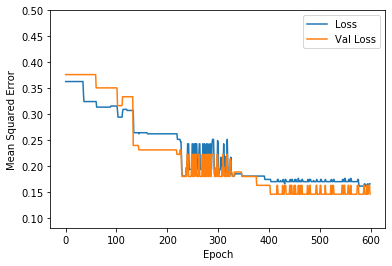

In [43]:

mae = df_hist["accuracy"].to_numpy()
val_mae = df_hist["val_accuracy"].to_numpy()
print("Final evaluation:", mae[-1], val_mae[-1] )
plot_the_loss_curve(epochs, mae,val_mae)

In [44]:
evaluation=my_model.evaluate(x = x_data_test, y = y_data_test, batch_size=batch_size)
predicted = my_model.predict(x_data_test)
print(evaluation)

df_test=pd.DataFrame(y_data_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
df_predict=pd.DataFrame(predicted,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
pd.concat([df_test,df_predict], axis=1).head()

1/1 [==============================] - 0s 0s/step - loss: 0.2040 - accuracy: 0.1507
[0.20398487150669098, 0.15068493783473969]


,k6a1_test,k6a2_test,k11_test,k12_test,k9a1_test,k9a2_test,k6a1_hat,k6a2_hat,k11_hat,k12_hat,k9a1_hat,k9a2_hat
0,0.25,0.25,0.25,0.25,0.50,0.50,0.280064,0.500615,0.473681,0.284294,0.378941,0.490462
1,0.25,0.25,0.25,0.25,0.75,0.75,0.484926,0.390655,0.498829,0.687230,0.491841,0.715675
2,0.25,0.25,0.25,0.50,0.50,0.50,0.280064,0.500615,0.473681,0.284294,0.378941,0.490462
3,0.25,0.25,0.25,0.50,0.75,0.25,0.280064,0.500615,0.473681,0.284294,0.378941,0.490462
4,0.25,0.25,0.50,0.50,0.50,0.50,0.241481,0.514597,0.457810,0.183884,0.363085,0.421731


In [45]:
my_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_46 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 126       
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________
